In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
import matplotlib as mpl

In [2]:
import sys
sys.path.append("../code")
import plotting

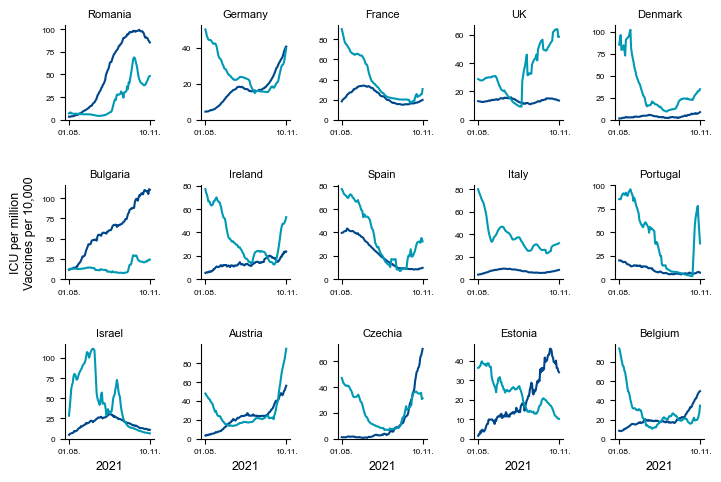

In [3]:
plotting.set_rcParams(arial=True)

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.titlesize"]= 8
mpl.rcParams["xtick.labelsize"] = 6
mpl.rcParams["ytick.labelsize"] = 6
mpl.rcParams["axes.labelsize"] = 9

owid_raw = pd.read_csv('../parameters/owid-covid-data.csv', sep=',', header=0)
owid = owid_raw.dropna(axis=0, how='any', subset=['icu_patients_per_million', 'new_vaccinations_smoothed_per_million'])


romania = owid[owid['iso_code'] == 'ROU']
germany = owid[owid['iso_code'] == 'DEU']
france = owid[owid['iso_code'] == 'FRA']
england = owid[owid['iso_code'] == 'GBR']
denmark = owid[owid['iso_code'] == 'DNK']

bulgaria = owid[owid['iso_code'] == 'BGR']
ireland = owid[owid['iso_code'] == 'IRL']
spain = owid[owid['iso_code'] == 'ESP']
italy = owid[owid['iso_code'] == 'ITA']
portugal = owid[owid['iso_code'] == 'PRT']

israel = owid[owid['iso_code'] == 'ISR']
austria = owid[owid['iso_code'] == 'AUT']
czechia = owid[owid['iso_code'] == 'CZE']
estonia = owid[owid['iso_code'] == 'EST']
belgium = owid[owid['iso_code'] == 'BEL']

isos = ['ROU', 'DEU', 'FRA', 'GBR', 'DNK', 'BGR', 'IRL', 'ESP', 'ITA', 'PRT', 'ISR', 'AUT', 'CZE', 'EST', 'BEL']

transl = {'ROU':'Romania', 'DEU':'Germany', 'FRA':'France', 'GBR':'UK', 'DNK':'Denmark', 
          'BGR':'Bulgaria', 'IRL':'Ireland','ESP':'Spain', 'ITA':'Italy', 'PRT':'Portugal',
         'ISR': 'Israel', 'AUT':'Austria', 'CZE':'Czechia', 'EST':'Estonia', 'BEL':'Belgium'}

colors = {
    'cICU': '#00468BFF',
    'cVaccines': '#0099B4FF',
}

countries = [romania, germany, france, england, denmark, 
             bulgaria, ireland, spain, italy, portugal, 
             israel, austria, czechia, estonia, belgium ]


start = '2021-08-02'
end = '2021-11-19'

cm = 1/2.54
fig = plt.figure(figsize=(18*cm, 12*cm), constrained_layout=True)
grid = fig.add_gridspec(ncols=5, nrows=3, hspace=0.2, wspace=0.15)

ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1])
ax3 = fig.add_subplot(grid[2])
ax4 = fig.add_subplot(grid[3])
ax5 = fig.add_subplot(grid[4])
ax6 = fig.add_subplot(grid[5])
ax7 = fig.add_subplot(grid[6])
ax8 = fig.add_subplot(grid[7])
ax9 = fig.add_subplot(grid[8])
ax10 = fig.add_subplot(grid[9])
ax11 = fig.add_subplot(grid[10])
ax12 = fig.add_subplot(grid[11])
ax13 = fig.add_subplot(grid[12])
ax14 = fig.add_subplot(grid[13])
ax15 = fig.add_subplot(grid[14])

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]

leftaxes = [ax1,ax6,ax11]
loweraxes = [ax11,ax12,ax13,ax14,ax15]
rightaxes = [ax5,ax10,ax15]


#icu_patients
#new_vaccinations_smoothed
#new_vaccinations_smoothed_per_million
#new_people_vaccinated_smoothed
#new_people_vaccinated_smoothed_per_hundred

    
def createdict(country):
    dictionary={}
    for i, j in enumerate(country['date']):
        dictionary[j] = i
    return dictionary


romania_dict = createdict(romania)
germany_dict = createdict(germany)
france_dict = createdict(france)
england_dict = createdict(england)
denmark_dict = createdict(denmark)
bulgaria_dict = createdict(bulgaria)
ireland_dict = createdict(ireland)
spain_dict = createdict(spain)
italy_dict = createdict(italy)
portugal_dict = createdict(portugal)
israel_dict = createdict(israel)
austria_dict = createdict(austria)
czechia_dict = createdict(czechia)
estonia_dict = createdict(estonia)
belgium_dict = createdict(belgium)


dicts = [romania_dict, germany_dict, france_dict, england_dict, denmark_dict, 
             bulgaria_dict, ireland_dict, spain_dict, italy_dict, portugal_dict, 
             israel_dict, austria_dict, czechia_dict, estonia_dict, belgium_dict ]



for ctry, ctrydict, iso, ax in zip(countries, dicts, isos,  axes):
    t = np.arange(0,ctrydict[end]-ctrydict[start], 1)
    ICU=ctry['icu_patients_per_million'][ctrydict[start]:ctrydict[end]]
    vaccines = np.array(ctry['new_vaccinations_smoothed_per_million'][ctrydict[start]:ctrydict[end]])/100
    
    ax.plot(t, ICU, color = colors['cICU'], label='ICU')

    ax.plot(t, vaccines, color=colors['cVaccines'],label='Vaccines')
    ax.set_ylim(0,None)
    ax.set_xticks([])
    ax.set_xticks([0, t[-1]])
    ax.set_xticklabels(['',''])
    ax.set_xticklabels(['01.08.','10.11.'])
    if ax in loweraxes:
        ax.set_xlabel('2021')
        ax.set_xticks([0, t[-1]])
        ax.set_xticklabels(['01.08.','10.11.'])
    ax.set_title(transl[iso])

ax6.set_ylabel('ICU per million\nVaccines per 10,000')


plt.savefig('./figures/fig_othercountries.pdf')
plt.show()